<a href="https://colab.research.google.com/github/behzcd/ML_projects/blob/main/Tashkent_HousePrice_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tashkent House Price Forecasting Model

####ML Model




In [61]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# In this project, I have used the CRSIP-DM Methodology.

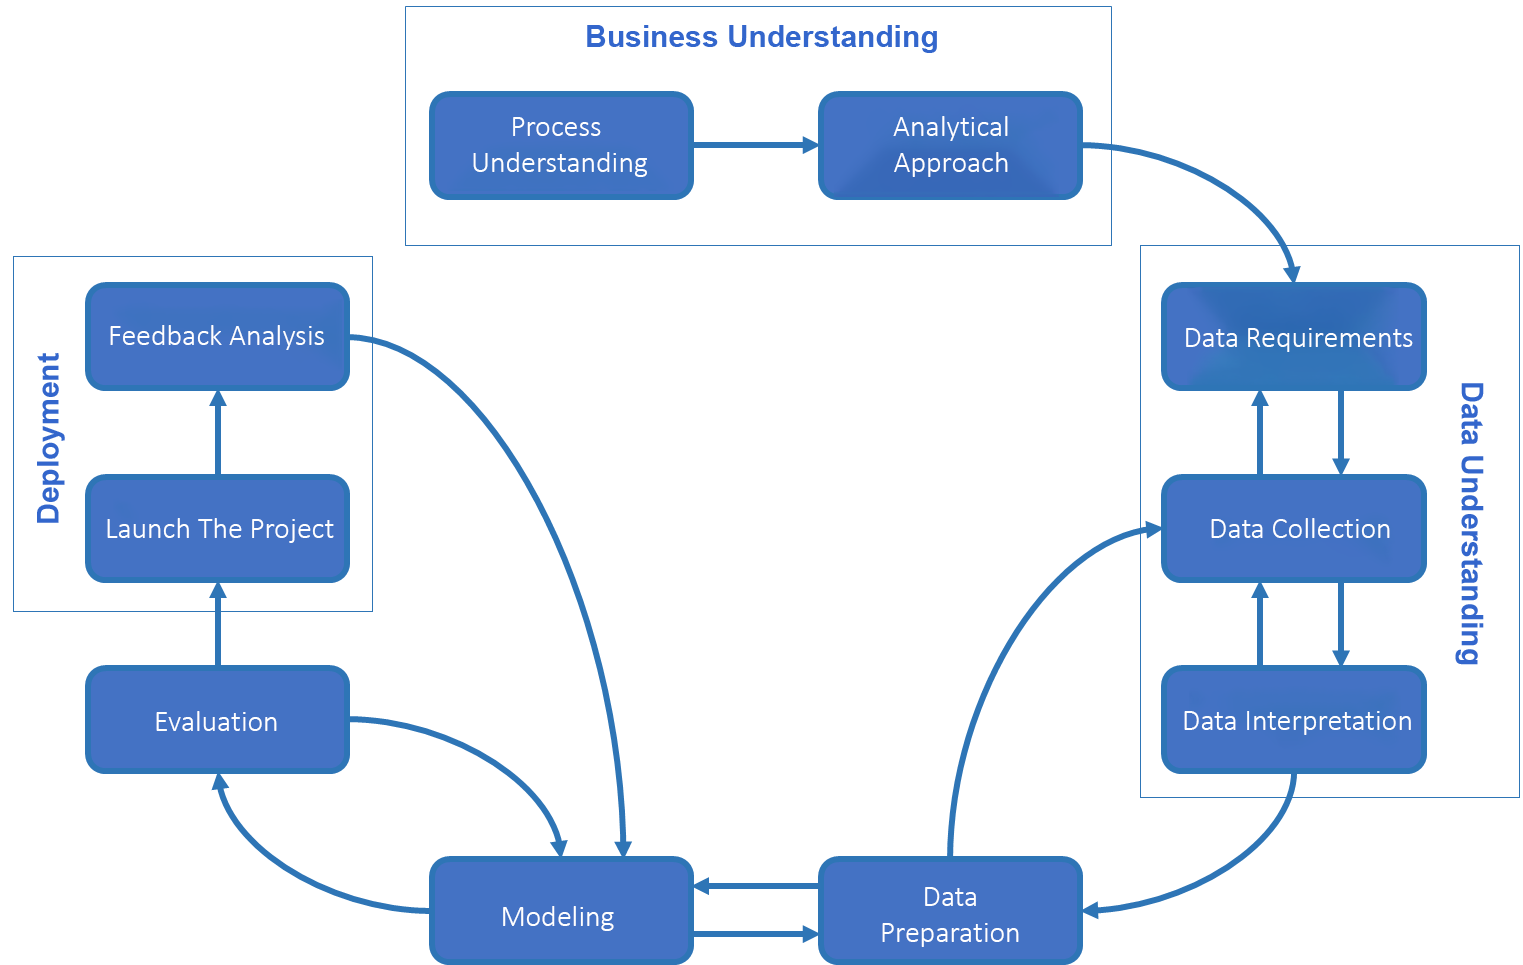



#STEP 1. BUSINES UNDERSTANDING.

So, A campany wants us to make a model which forecats the prices of the houses built in Tashkent regions. The company is going to use it in building the future houses in that city. 

- **The given Data**: The result of a survey conducted for the population census in Tashkent. It consists some information about where the houses are located, the number of the rooms, in which floor they are, the size of the whole building, and house prices. 

- So, **the Project** is to make a model by using the data given, which assumes the median prices of the houses in different region of the city.

###Analitical Approach.

- Model: Supervised, Unsupervised, Reinforcement?
- Algorithm: Classification, Regression, or other kinds?
- Method: Online or Offline?

The answer to the questions above:


1.   **Supervised learning** - because we have the Label in the data. It is the Median parices in the region. We are also axactly going to forecast those prices.
2.   **Regression** - We used the term 'Forecasting' and this means it is handled by the regression algorithms.
3.   **Offline** - because the data has been already given one time. There is no any up-to-date, constant data flow. 



#STEP 2. DATA UNDERSTANDING.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [63]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Definition of the columns:
- `location` - the location of selling houses
- `district` - the region where the houses are
- `rooms` - the number of the rooms
- `size` - house area (kv.m)
- `level` - the floor where the house is located
- `max_levels` - total number of floors
- `price` - house price

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [65]:
df['location'].value_counts()

город Ташкент, Чиланзарский район, Чиланзар                112
город Ташкент, Яккасарайский район, Кушбеги                110
город Ташкент, Мирзо-Улугбекский район, Буюк Ипак Йули      87
город Ташкент, Яккасарайский район, Бабура                  82
город Ташкент, Учтепинский район, Чиланзар 24-й квартал     79
                                                          ... 
город Ташкент, Юнусабадский район, 8-й проезд Янгишахар      1
город Ташкент, Учтепинский район, 1-й проезд Козигузар       1
город Ташкент, Чиланзарский район, Яккабог                   1
город Ташкент, Олмазорский район, Каракамыш2/4               1
город Ташкент, Яшнободский район, Базар Кадышева             1
Name: location, Length: 1600, dtype: int64

In [66]:
len(df['location'].unique())

1600

In [67]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [69]:
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [70]:
df.iloc[5347,3] = 100

In [71]:
df['size'] = df['size'].astype(float)

In [73]:
df[df['price']=='Договорная']

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119.0,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160.0,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105.0,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90.0,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48.0,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.7,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51.0,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208.0,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35.0,2,9,Договорная


In [74]:
df[df['price']=='Договорная']['size'].mean()

93.05858585858586

In [75]:
df[df['price']=='Договорная']['rooms'].mean()

2.878787878787879

In [76]:
df[df['price']=='Договорная']['level'].mean()

4.121212121212121

In [77]:
df[(df['size']==93) & (df['rooms']==3) & (df['level']==4)]

,location,district,rooms,size,level,max_levels,price
723,"город Ташкент, Яшнободский район, Рисовый базар",Яшнободский,3,93.0,4,7,46500
1399,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,93.0,4,5,80000
5241,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,93.0,4,5,80000
5706,"город Ташкент, Яккасарайский район, Конституция",Яккасарайский,3,93.0,4,4,65000
7124,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,93.0,4,4,73500


In [37]:
(46500+160000+65000+73500)/5

69000.0

In [78]:
df.replace('Договорная',69000,inplace=True)

In [79]:
df['price'] = df['price'].astype(int)

In [80]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7565.000000,7565.000000,7565.000000,7.565000e+03
mean,2.625644,113.267236,3.699273,6.038202,7.130366e+04
std,1.085201,1491.213517,2.237275,2.613271,6.363182e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.700000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.800000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


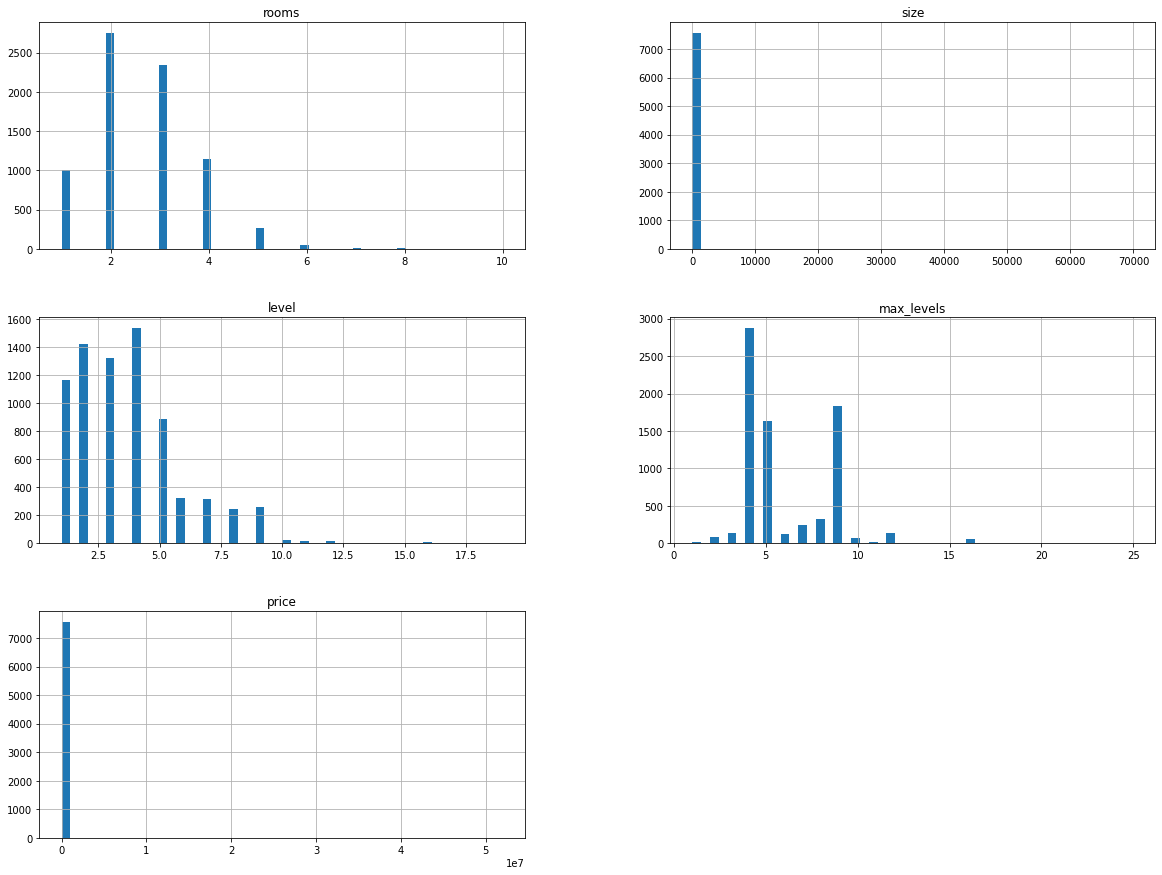

In [81]:
%matplotlib inline
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [86]:
df1 = df[df['size']<300]
df1 = df[df['price']<1_000_000]

In [87]:
df1.shape

(7556, 7)

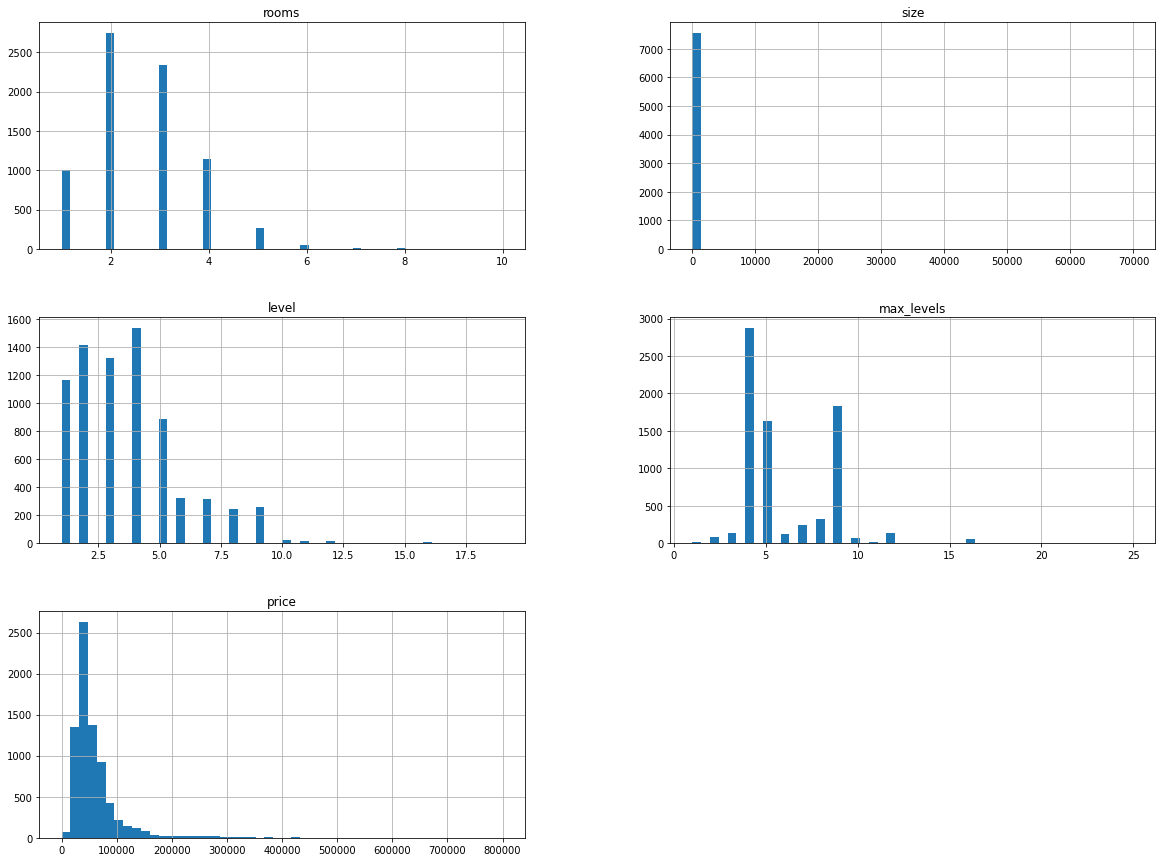

In [88]:
df1.hist(bins = 50, figsize=(20,15))
plt.show()

In [89]:
df.corrwith(df['price']).sort_values(ascending=False)

price         1.000000
rooms         0.055693
max_levels    0.011048
size          0.001107
level        -0.003439
dtype: float64

In [91]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

#STEP 3. DATA PREPARATION.

In [92]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [95]:
x_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()

In [96]:
df['district'].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

In [98]:
x_train_num = x_train.drop(['location', 'district'], axis=1)
x_train_num

,rooms,size,level,max_levels
4552,2,52.0,3,4
4450,4,187.0,2,5
1656,1,39.0,2,5
3570,2,74.0,3,6
6618,4,165.0,4,7
...,...,...,...,...
5191,3,70.0,4,4
5226,4,92.0,9,9
5390,2,49.0,1,3
860,2,60.0,3,4


In [100]:
x_train_cat = x_train[['district']]
x_train_cat.head()

,district
4552,Учтепинский
4450,Мирзо-Улугбекский
1656,Яккасарайский
3570,Юнусабадский
6618,Шайхантахурский


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(x_train_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

x_prepared = full_pipeline.fit_transform(x_train)

x_prepared

array([[-0.57746118, -0.03810586, -0.31266907, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25131698,  0.06793376, -0.75864437, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49185026, -0.04831708, -0.75864437, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.57746118, -0.04046229, -1.20461968, ...,  0.        ,
         0.        ,  0.        ],
       [-0.57746118, -0.03182203, -0.31266907, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3369279 , -0.00668671, -0.75864437, ...,  0.        ,
         0.        ,  0.        ]])

#STEP 4. MODELING.

In [117]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(x_prepared, y_train)

LinearRegression()

In [119]:
predict=LR_model.predict(x_prepared)
predict

array([ 93455.91809739, 111427.74799981,  23660.13089993, ...,
        41837.49069923,  84377.34259327, 137511.88903836])

#STEP 5. EVALUATION.

In [120]:
pd.DataFrame({'Guesses':predict, 'Real prices': y_train})

,Guesses,Real prices
4552,93455.918097,37000
4450,111427.748000,210000
1656,23660.130900,27500
3570,50445.256450,46835
6618,153008.572078,140000
...,...,...
5191,71471.732028,43500
5226,80952.493161,56000
5390,41837.490699,58500
860,84377.342593,53000


In [121]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predict,y_train)
error=np.sqrt(mse)
print(error)

701074.4688052656


In [122]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(x_prepared, y_train)

RandomForestRegressor()

In [126]:
predict=RF_model.predict(x_prepared)
predict

array([ 38312.41666667, 226210.        ,  26778.11261794, ...,
       134472.46794872,  49757.02813853,  57712.41666667])

In [128]:
pd.DataFrame({'Guesses':predict, 'Real prices': y_train})

,Guesses,Real prices
4552,38312.416667,37000
4450,226210.000000,210000
1656,26778.112618,27500
3570,48114.780000,46835
6618,143066.666667,140000
...,...,...
5191,55352.440637,43500
5226,57870.988000,56000
5390,134472.467949,58500
860,49757.028139,53000


In [127]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(predict,y_train)
error=np.sqrt(mse)
print(error)

306862.87141365645


In [129]:
X = df.drop("price", axis=1)
y = df["price"].copy()
X_prepared = full_pipeline.transform(X)


In [130]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std.dev:", scores.std())


In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

display_scores(LR_rmse_scores)

Scores: [  72046.62341122   46241.22000378  143483.57875335   42268.46914413
   48655.12571508   43248.50372939   51699.79841165 1888787.404122
  165637.3627407   645796.64695378]
Mean: 314786.4732985086
Std.dev: 552966.1306194335


In [132]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [  68686.7580128    80466.31091953  220928.11235842   67486.70722113
  441198.64878253  158367.71246163  247753.44814095 1890460.49414186
  343156.71300112  653481.79710602]
Mean: 417198.67021459824
Std.dev: 521896.8576217086


In [133]:
import joblib

filename = 'LR_model.jbl'
joblib.dump(LR_model, filename)

['LR_model.jbl']